<a href="https://colab.research.google.com/github/amolpatil1976/British-Airways-Data-Analytics/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | After several delays and ca...
1,Not Verified | Literally the worst flight of ...
2,✅ Trip Verified | I swore I would never fly B...
3,✅ Trip Verified | Obviously many airlines hav...
4,✅ Trip Verified | Lost 3 out of 4 checked bags...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,✅ Trip Verified | After several delays and ca...
1,Not Verified | Literally the worst flight of ...
2,✅ Trip Verified | I swore I would never fly B...
3,✅ Trip Verified | Obviously many airlines hav...
4,✅ Trip Verified | Lost 3 out of 4 checked bags...
...,...
995,✅ Trip Verified | \r\nBA’s Galleries lounge at...
996,✅ Trip Verified | Gatwick to San Jose. I’ve j...
997,✅ Trip Verified | I took the new option of the...
998,Not Verified | First time flying with British...


In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [ ]:
df

,reviews
0,"After several delays and canceled flights, w..."
1,Literally the worst flight of my life. After...
2,I swore I would never fly BA again after the...
3,Obviously many airlines have gone downhill i...
4,Lost 3 out of 4 checked bags. Denied wheelcha...
...,...
995,\r\nBA’s Galleries lounge at CPT is adequate ...
996,Gatwick to San Jose. I’ve just stepped onto ...
997,I took the new option of the new Toronto to L...
998,First time flying with British Airways in ec...


In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,"After several delays and canceled flights, w...",After several delays and canceled flights we ...
1,Literally the worst flight of my life. After...,Literally the worst flight of my life After b...
2,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...
3,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...
4,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,"After several delays and canceled flights, w...",After several delays and canceled flights we ...,"[(several, a), (delays, n), (canceled, a), (fl..."
1,Literally the worst flight of my life. After...,Literally the worst flight of my life After b...,"[(Literally, r), (worst, a), (flight, n), (lif..."
2,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...,"[(swore, v), (would, None), (never, r), (fly, ..."
3,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...,"[(Obviously, r), (many, a), (airlines, n), (go..."
4,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...,"[(Lost, v), (checked, n), (bags, n), (Denied, ..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"After several delays and canceled flights, w...",After several delays and canceled flights we ...,"[(several, a), (delays, n), (canceled, a), (fl...",several delay canceled flight finally make C...
1,Literally the worst flight of my life. After...,Literally the worst flight of my life After b...,"[(Literally, r), (worst, a), (flight, n), (lif...",Literally bad flight life book ticket togeth...
2,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...,"[(swore, v), (would, None), (never, r), (fly, ...",swear would never fly BA mess much try get B...
3,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...,"[(Obviously, r), (many, a), (airlines, n), (go...",Obviously many airline go downhill recent ye...
4,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...,"[(Lost, v), (checked, n), (bags, n), (Denied, ...",Lost checked bag Denied wheelchair assistanc...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"After several delays and canceled flights, w...",several delay canceled flight finally make C...
1,Literally the worst flight of my life. After...,Literally bad flight life book ticket togeth...
2,I swore I would never fly BA again after the...,swear would never fly BA mess much try get B...
3,Obviously many airlines have gone downhill i...,Obviously many airline go downhill recent ye...
4,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost checked bag Denied wheelchair assistanc...
...,...,...
995,\r\nBA’s Galleries lounge at CPT is adequate ...,BA Galleries lounge CPT adequate let poor fo...
996,Gatwick to San Jose. I’ve just stepped onto ...,Gatwick San Jose step onto BA flight Gatwick...
997,I took the new option of the new Toronto to L...,take new option new Toronto London Gatwick d...
998,First time flying with British Airways in ec...,First time fly British Airways economy Trans...


In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.2 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"After several delays and canceled flights, w...",After several delays and canceled flights we ...,"[(several, a), (delays, n), (canceled, a), (fl...",several delay canceled flight finally make C...,-0.5106,Negative
1,Literally the worst flight of my life. After...,Literally the worst flight of my life After b...,"[(Literally, r), (worst, a), (flight, n), (lif...",Literally bad flight life book ticket togeth...,-0.1531,Negative
2,I swore I would never fly BA again after the...,I swore I would never fly BA again after they...,"[(swore, v), (would, None), (never, r), (fly, ...",swear would never fly BA mess much try get B...,0.8888,Positive
3,Obviously many airlines have gone downhill i...,Obviously many airlines have gone downhill in...,"[(Obviously, r), (many, a), (airlines, n), (go...",Obviously many airline go downhill recent ye...,-0.9588,Negative
4,Lost 3 out of 4 checked bags. Denied wheelcha...,Lost out of checked bags Denied wheelchair as...,"[(Lost, v), (checked, n), (bags, n), (Denied, ...",Lost checked bag Denied wheelchair assistanc...,-0.9702,Negative


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    526
Negative    369
Neutral     105
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f38db9570d0>,
 [Text(-0.08974975155714607, 1.0963325143839484, 'Positive'),
  Text(-0.2702102356991396, -1.0662956571811664, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(-0.048954409940261484, 0.5979995533003355, '52.6%'),
  Text(-0.14738740129043978, -0.5816158130079089, '36.9%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

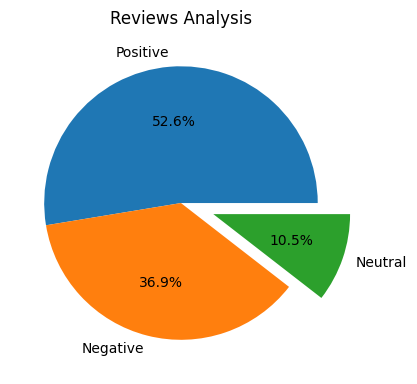

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

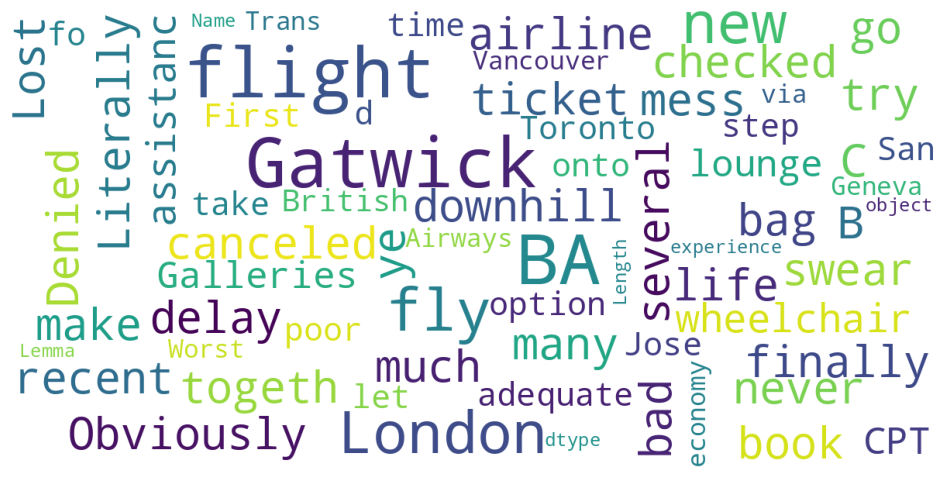

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)